# Imports

In [6]:
import os
import seaborn
import pandas as pd
import matplotlib.pyplot as pl
import scipy.constants as constants
from scipy.stats import ks_2samp
pd.options.display.max_rows = 10000
%matplotlib inline

In [7]:
filter(lambda x: x.endswith('.csv'), os.listdir('Data/'))

['singlelane.csv',
 'singlelane_5050input.csv',
 'singlelane_slow.csv',
 'singlelane_slow1.csv',
 'singlelane_slow2.csv',
 'singlelane_slow2_vehslowing2.csv']

# Load PeMS Data (Station 500011222)

In [37]:
cols = ['Timestamp', 'Station', 'District', 'FreewayNum', 'Direction', 'LaneType',
        'StationLength', 'Samples', 'PercObs', 'TotalFlow', 'AvgOcc', 'AvgSpeed']
df = pd.read_csv('Data/d05_text_station_5min_2016_08_05.txt', usecols=range(12), names=cols)
df = df[df['Station'] == 500011121]

In [38]:
df.head(2)

,Timestamp,Station,District,FreewayNum,Direction,LaneType,StationLength,Samples,PercObs,TotalFlow,AvgOcc,AvgSpeed
34,08/05/2016 00:00:00,500011121,5,1,N,ML,1.515,10,100,8,0.0083,65.0
236,08/05/2016 00:05:00,500011121,5,1,N,ML,1.515,8,100,15,0.0149,65.0


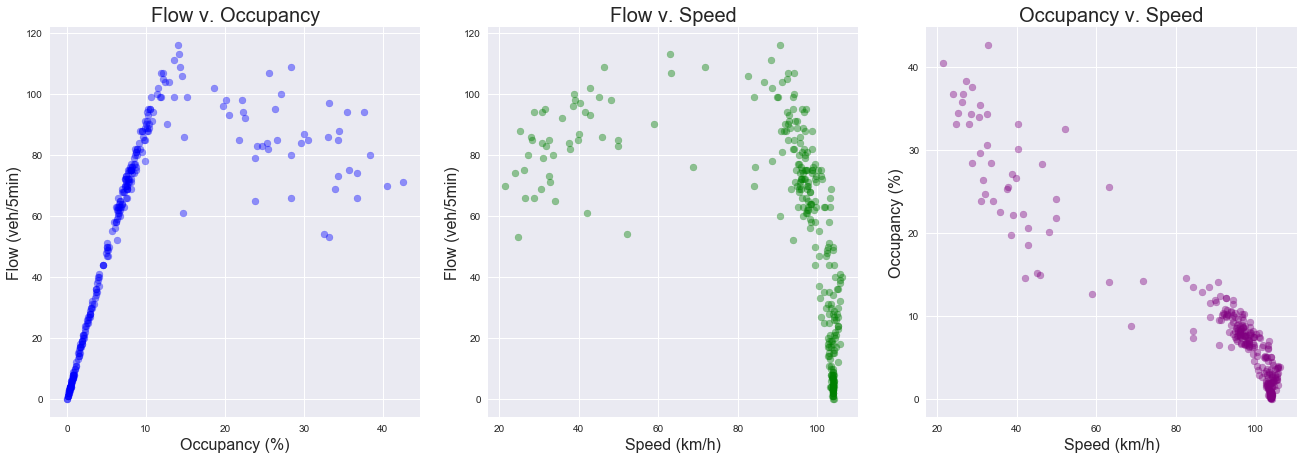

In [102]:
fig, ([ax1, ax2, ax3]) = pl.subplots(nrows=1, ncols=3, figsize=(18, 6))
fig.tight_layout(w_pad=4)

ax1.scatter(df.AvgOcc * 100, df.TotalFlow, c='b', alpha=0.4)
ax1.set_title('Flow v. Occupancy', size=20)
ax1.set_xlabel('Occupancy (%)', size=16)
ax1.set_ylabel('Flow (veh/5min)', size=16)

ax2.scatter(df.AvgSpeed * 1.6, df.TotalFlow, c='g', alpha=0.4)
ax2.set_title('Flow v. Speed', size=20)
ax2.set_xlabel('Speed (km/h)', size=16)
ax2.set_ylabel('Flow (veh/5min)', size=16)

ax3.scatter(df.AvgSpeed * 1.6, df.AvgOcc * 100, c='purple', alpha=0.4)
ax3.set_title('Occupancy v. Speed', size=20)
ax3.set_xlabel('Speed (km/h)', size=16)
ax3.set_ylabel('Occupancy (%)', size=16)

In [56]:
# Station 500011121: 1 lane, 1.515 miles, 70Mph limit, 
avg_speed = (df.AvgSpeed.mean() * constants.mile) / 1000 # Avg speed (kph).
road_length = 1.515 * constants.mile # Road length (m).
cell_counts = road_length / 7.5 # 7.5m cell length

print '''At Station 500011121:\n Avg. Speed: {}\n Road Length: {}\n Cell Counts: {}''' \
        .format(avg_speed, road_length, cell_counts)

At Station 500011121:
 Avg. Speed: 90.2439648
 Road Length: 2438.15616
 Cell Counts: 325.087488


# Simulated Data

In [100]:
# Scaled simulation no slowing sections.
data1 = pd.read_csv('Data/singlelane.csv', names=['flow', 'occ', 'avgspeed'], usecols=[0,1,2])

# Scaled simulation with one slowing section.
data_slow = pd.read_csv('Data/singlelane_slow.csv', names=['flow', 'occ', 'avgspeed'], usecols=[0,1,2])

# Scaled simulation with two slowing section.
data_slow1 = pd.read_csv('Data/singlelane_slow1.csv', names=['flow', 'occ', 'avgspeed'], usecols=[0,1,2])

#Scaled simulation with two slowing sections (one longer), best fit.
data_slow2 = pd.read_csv('Data/singlelane_slow2.csv', names=['flow', 'occ', 'avgspeed'], usecols=[0,1,2])

# Scaled simulation where vehicles can randomly slow down by 2.
data_slow2_alt = pd.read_csv('Data/singlelane_slow2_vehslowing2.csv',
                             names=['flow', 'occ', 'avgspeed'], usecols=[0,1,2])

## Occ v. Flow

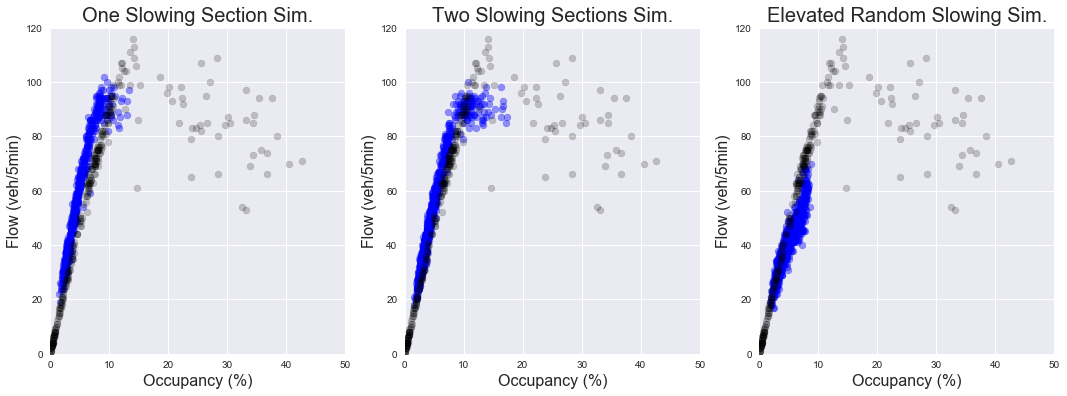

In [115]:
fig, ([ax1, ax2, ax3]) = pl.subplots(nrows=1, ncols=3, figsize=(18, 6))

ax1.scatter(data_slow.occ, data_slow.flow, c='b', alpha=0.4)
ax1.set_title('One Slowing Section Sim.', size=20)

ax2.scatter(data_slow2.occ, data_slow2.flow, c='b', alpha=0.4)
ax2.set_title('Two Slowing Sections Sim.', size=20)

ax3.scatter(data_slow2_alt.occ, data_slow2_alt.flow, c='b', alpha=0.4)
ax3.set_title('Elevated Random Slowing Sim.', size=20)

for ax in fig.axes:
    ax.set_xlim(0, 50)
    ax.set_ylim(0, 120)
    ax.set_xlabel('Occupancy (%)', size=16)
    ax.set_ylabel('Flow (veh/5min)', size=16)
    ax.scatter(df.AvgOcc * 100, df.TotalFlow, label=i, c='k', alpha=0.2)

In [99]:
print ks_2samp(df.TotalFlow, data_slow.flow)
print ks_2samp(df.TotalFlow, data_slow2.flow)
print ks_2samp(df.TotalFlow, data_slow2_alt.flow)

Ks_2sampResult(statistic=0.27250996918615189, pvalue=2.693057494048894e-13)
Ks_2sampResult(statistic=0.25236111111111109, pvalue=2.4019364423352e-12)
Ks_2sampResult(statistic=0.49513888888888885, pvalue=2.5862464254622796e-46)


## Speed v. Flow

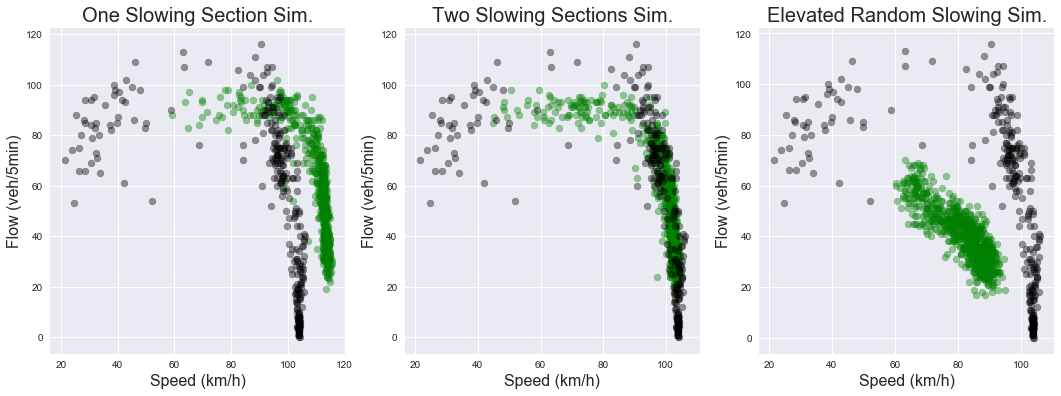

In [116]:
fig, ([ax1, ax2, ax3]) = pl.subplots(nrows=1, ncols=3, figsize=(18, 6))

ax1.scatter(data_slow.avgspeed * 7.5 * 3.6, data_slow.flow, c='g', alpha=0.4)
ax1.set_title('One Slowing Section Sim.', size=20)

ax2.scatter(data_slow2.avgspeed * 7.5 * 3.6, data_slow2.flow, c='g', alpha=0.4)
ax2.set_title('Two Slowing Sections Sim.', size=20)

ax3.scatter(data_slow2_alt.avgspeed * 7.5 * 3.6, data_slow2_alt.flow, c='g', alpha=0.4)
ax3.set_title('Elevated Random Slowing Sim.', size=20)

for ax in fig.axes:
    ax.set_xlabel('Speed (km/h)', size=16)
    ax.set_ylabel('Flow (veh/5min)', size=16)
    ax.scatter(df.AvgSpeed * 1.6, df.TotalFlow, label=i, c='k', alpha=0.4)

In [112]:
print ks_2samp(df.AvgSpeed * 1.6, data_slow.avgspeed * 7.5 * 3.6)
print ks_2samp(df.AvgSpeed * 1.6, data_slow1.avgspeed * 7.5 * 3.6)
print ks_2samp(df.AvgSpeed * 1.6, data_slow2_alt.avgspeed * 7.5 * 3.6)

Ks_2sampResult(statistic=0.80076921334058371, pvalue=1.4621066491362329e-111)
Ks_2sampResult(statistic=0.65341269841269844, pvalue=1.8713835157961791e-77)
Ks_2sampResult(statistic=0.755, pvalue=4.040622005257198e-107)


## Speed v. Occ

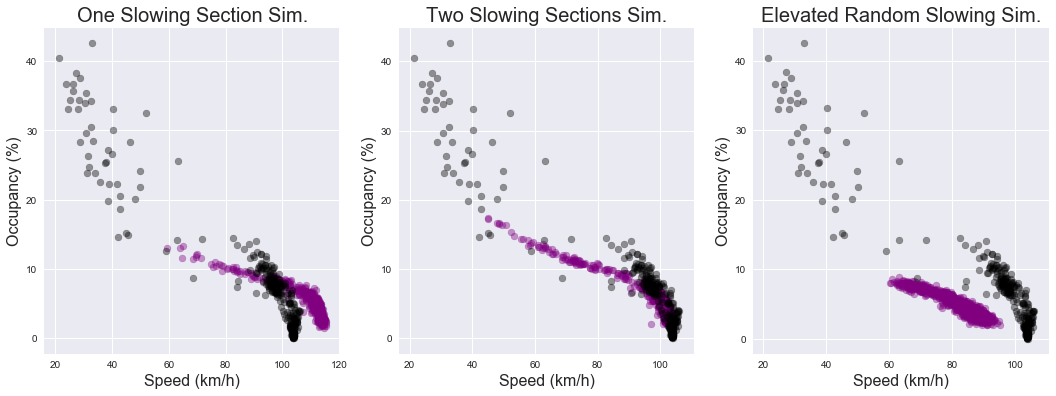

In [122]:
fig, ([ax1, ax2, ax3]) = pl.subplots(nrows=1, ncols=3, figsize=(18, 6))

ax1.scatter(data_slow.avgspeed * 7.5 * 3.6, data_slow.occ, c='purple', alpha=0.4)
ax1.set_title('One Slowing Section Sim.', size=20)

ax2.scatter(data_slow2.avgspeed * 7.5 * 3.6, data_slow2.occ, c='purple', alpha=0.4)
ax2.set_title('Two Slowing Sections Sim.', size=20)

ax3.scatter(data_slow2_alt.avgspeed * 7.5 * 3.6, data_slow2_alt.occ, c='purple', alpha=0.4)
ax3.set_title('Elevated Random Slowing Sim.', size=20)

for ax in fig.axes:
    ax.set_xlabel('Speed (km/h)', size=16)
    ax.set_ylabel('Occupancy (%)', size=16)
    ax.scatter(df.AvgSpeed * 1.6, df.AvgOcc * 100, label=i, c='k', alpha=0.4)

In [123]:
print ks_2samp(df.AvgOcc * 100, data_slow.occ)
print ks_2samp(df.AvgOcc * 100, data_slow1.occ)
print ks_2samp(df.AvgOcc * 100, data_slow2_alt.occ)

Ks_2sampResult(statistic=0.31043819104585829, pvalue=3.9644467955712235e-17)
Ks_2sampResult(statistic=0.32720238095238102, pvalue=9.6670309184652431e-20)
Ks_2sampResult(statistic=0.36541666666666661, pvalue=2.0306731669695937e-25)
